In [54]:
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1)

In [4]:
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [5]:
mnist['data'].shape

(70000, 784)

In [6]:
mnist['target'].shape

(70000,)

In [7]:
mnist['feature_names']

['pixel1',
 'pixel2',
 'pixel3',
 'pixel4',
 'pixel5',
 'pixel6',
 'pixel7',
 'pixel8',
 'pixel9',
 'pixel10',
 'pixel11',
 'pixel12',
 'pixel13',
 'pixel14',
 'pixel15',
 'pixel16',
 'pixel17',
 'pixel18',
 'pixel19',
 'pixel20',
 'pixel21',
 'pixel22',
 'pixel23',
 'pixel24',
 'pixel25',
 'pixel26',
 'pixel27',
 'pixel28',
 'pixel29',
 'pixel30',
 'pixel31',
 'pixel32',
 'pixel33',
 'pixel34',
 'pixel35',
 'pixel36',
 'pixel37',
 'pixel38',
 'pixel39',
 'pixel40',
 'pixel41',
 'pixel42',
 'pixel43',
 'pixel44',
 'pixel45',
 'pixel46',
 'pixel47',
 'pixel48',
 'pixel49',
 'pixel50',
 'pixel51',
 'pixel52',
 'pixel53',
 'pixel54',
 'pixel55',
 'pixel56',
 'pixel57',
 'pixel58',
 'pixel59',
 'pixel60',
 'pixel61',
 'pixel62',
 'pixel63',
 'pixel64',
 'pixel65',
 'pixel66',
 'pixel67',
 'pixel68',
 'pixel69',
 'pixel70',
 'pixel71',
 'pixel72',
 'pixel73',
 'pixel74',
 'pixel75',
 'pixel76',
 'pixel77',
 'pixel78',
 'pixel79',
 'pixel80',
 'pixel81',
 'pixel82',
 'pixel83',
 'pixel84',
 

In [8]:
mnist['DESCR']

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [9]:
X, y = mnist['data'], mnist['target']

In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [11]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)

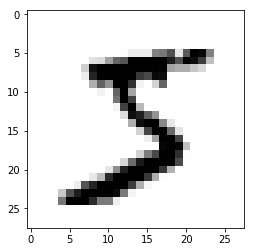

In [12]:
plt.imshow(some_digit_image, cmap=mpl.cm.binary, interpolation='nearest')
#plt.axis('off')

In [13]:
y[0]

'5'

In [14]:
y = y.astype(np.uint8)

In [15]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [16]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [17]:
from sklearn.linear_model import SGDClassifier

In [55]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=None, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [56]:
sgd_clf.predict([some_digit])

array([ True])

In [57]:
from sklearn.model_selection import cross_val_score

In [58]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.96305, 0.966  , 0.9643 ])

In [59]:
from sklearn.base import BaseEstimator

In [60]:
class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    
    def predict(self, X):
        return np.zeros(len(X), dtype=bool)

In [61]:
never_5_clf = Never5Classifier()

In [62]:
cross_val_score(never_5_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.91125, 0.90855, 0.90915])

### Confusion Matrix

In [63]:
from sklearn.model_selection import cross_val_predict

In [64]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [65]:
y_train_pred.shape

(60000,)

In [66]:
from sklearn.metrics import confusion_matrix

In [67]:
confusion_matrix(y_train_5, y_train_pred)

array([[53546,  1033],
       [ 1176,  4245]], dtype=int64)

In [68]:
from sklearn.metrics import precision_score, recall_score

In [69]:
precision_score(y_train_5, y_train_pred)

0.8042819249715801

In [70]:
recall_score(y_train_5, y_train_pred)

0.7830658550083011

In [71]:
3873 / (1013+3873)

0.7926729431027425

In [72]:
3873 / (1548+3873)

0.7144438295517432

In [73]:
from sklearn.metrics import f1_score

In [74]:
f1_score(y_train_5, y_train_pred)

0.7935321058042808

In [75]:
y_scores = sgd_clf.decision_function([some_digit])

In [76]:
y_scores

array([1232.0262159])

In [77]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [78]:
y_scores.shape

(60000,)

In [79]:
y_scores[:5]

array([  2291.43612319, -13595.62600782, -20608.50895259, -11252.53070182,
       -14424.35613821])

In [80]:
from sklearn.metrics import precision_recall_curve

In [81]:
precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [83]:
precisions.shape, recalls.shape, thresholds.shape

((59967,), (59967,), (59966,))

In [85]:
precisions[-1], recalls[-1]

(1.0, 0.0)

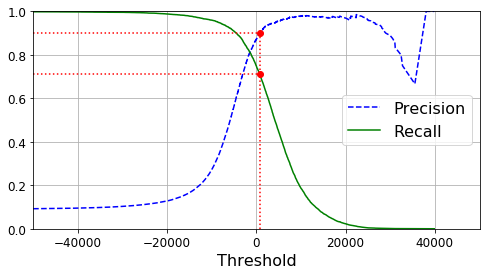

In [96]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], 'b--', label='Precision')
    plt.plot(thresholds, recalls[:-1], 'g-', label='Recall')
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)
    plt.axis([-50000, 50000, 0, 1])

plt.figure(figsize=(8, 4))      
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([748, 748], [0., 0.9], "r:")     
plt.plot([-50000, 748], [0.9, 0.9], "r:") 
plt.plot([-50000, 748], [0.7098, 0.7098], "r:")
plt.plot([748], [0.9], "ro")                   # Not shown
plt.plot([748], [0.7098], "ro")                # Not shown

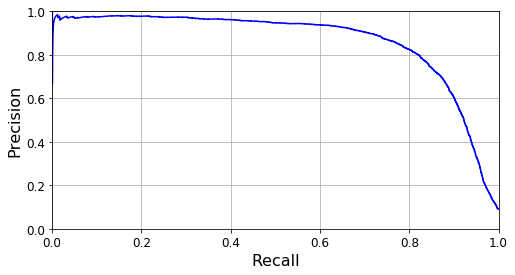

In [99]:
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-")
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

plt.figure(figsize=(8, 4))  
plot_precision_vs_recall(precisions, recalls)

In [90]:
threshold_90_precision = thresholds[np.where(precisions >= 0.9)[0][0]]
threshold_90_precision

748.3624967414072

In [93]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [94]:
precision_score(y_train_5, y_train_pred_90)

0.9001169590643275

In [95]:
recall_score(y_train_5, y_train_pred_90)

0.709832134292566

### ROC

In [100]:
from sklearn.metrics import roc_curve

In [101]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

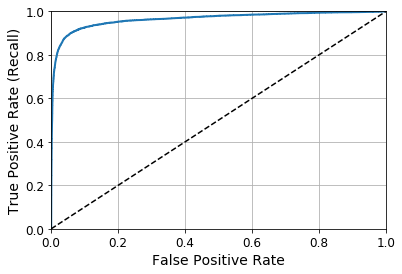

In [103]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate (Recall)')
    plt.grid(True)
    plt.axis([0, 1, 0, 1])
    
plot_roc_curve(fpr, tpr)

In [104]:
from sklearn.metrics import roc_auc_score

In [105]:
roc_auc_score(y_train_5, y_scores)

0.964570770099183